In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import healpy as hp

In [2]:
n_side = 256 #risoluzione
hp.nside2npix(n_side)

786432

In [3]:
hp.nside2pixarea(256,degrees=True)

0.052455852825697924

In [4]:
hp_map = np.arange(hp.nside2npix(n_side))

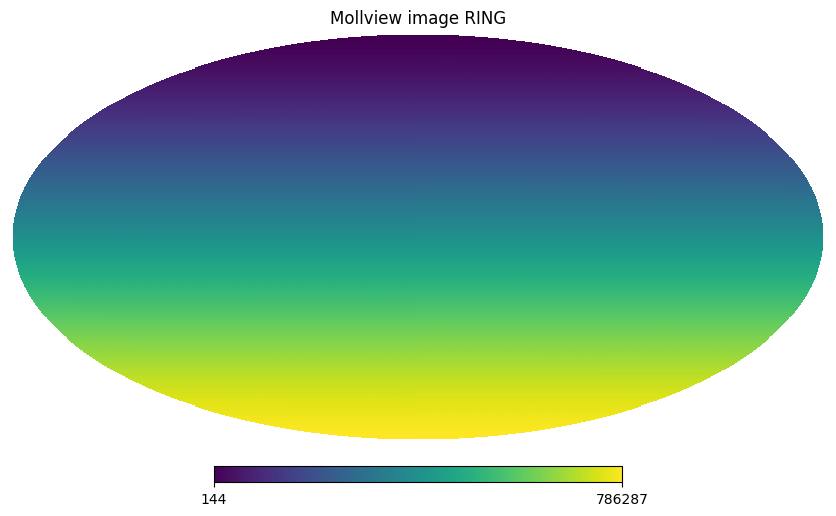

In [5]:
hp.mollview(hp_map, title="Mollview image RING")

In [6]:
hp.ang2pix(n_side,theta=np.pi/2,phi=0)

391680

In [7]:
omegab = 0.05
omegac = 0.25
h = 0.7
As=2.1e-9
ns = 0.96
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 100*h, ombh2=omegab*h**2,omch2=omegac*h**2)
results = camb.get_results(pars)

In [8]:
power =results.get_cmb_power_spectra(pars, CMB_unit='muK')

In [9]:
power.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [10]:
c_l = power["unlensed_scalar"][:,0]
print(c_l.shape)

(2401,)


In [11]:
ells = np.arange(len(c_l))

Text(0.5, 0, '$\\ell$')

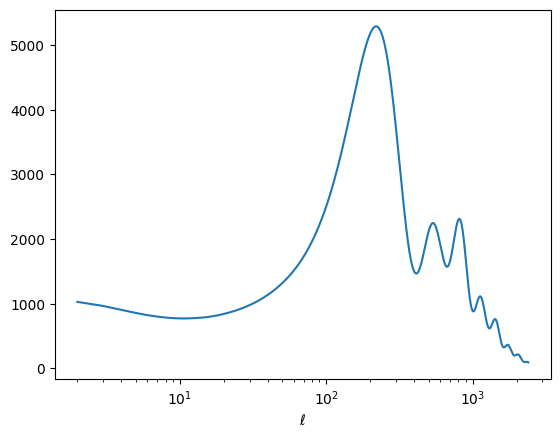

In [12]:
plt.semilogx(ells[2:],c_l[2:])
plt.xlabel('$\ell$')
#plt.ylabel('$\ell(\ell+1)C_\ell/ (2\pi \mu{\rm K}^2)$')

In [13]:
power =results.get_cmb_power_spectra(pars, CMB_unit='K',raw_cl=True)

Text(0.5, 0, '$\\ell$')

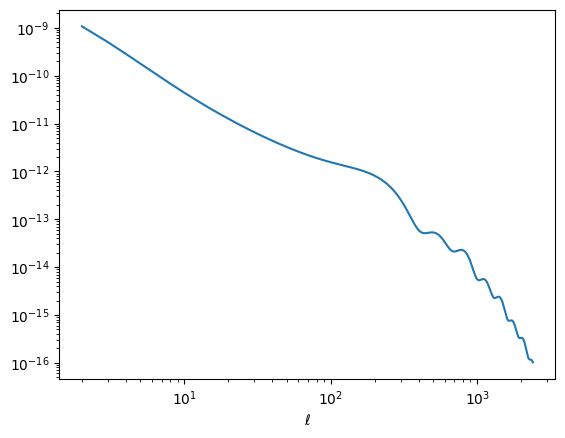

In [14]:
c_l = power["unlensed_scalar"][:,0]
plt.loglog(ells[2:],c_l[2:])
plt.xlabel('$\ell$')
#plt.ylabel('$\ell(\ell+1)C_\ell/ (2\pi \mu{\rm K}^2)$')

In [15]:
alms = hp.synalm(c_l)
print(alms.shape)

(2883601,)


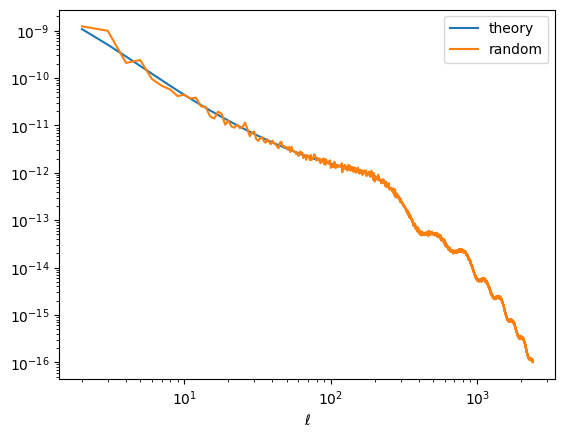

In [16]:
plt.loglog(ells[2:],c_l[2:],label='theory')
plt.loglog(ells[2:],hp.alm2cl(alms)[2:],label='random')
plt.xlabel('$\ell$')
plt.legend()
#plt.ylabel('$\ell(\ell+1)C_\ell/ (2\pi \mu{\rm K}^2)$')

per l grandi ho mediato su tanti alm e quindi il valore random si avvicina bene a quello teorico
ricorda la definizione di cl

In [33]:
mock_map = hp.alm2map(alms, nside=1024)
print(mock_map.shape)
print(hp.nside2pixarea(64,degrees=True))


(12582912,)
0.8392936452111668


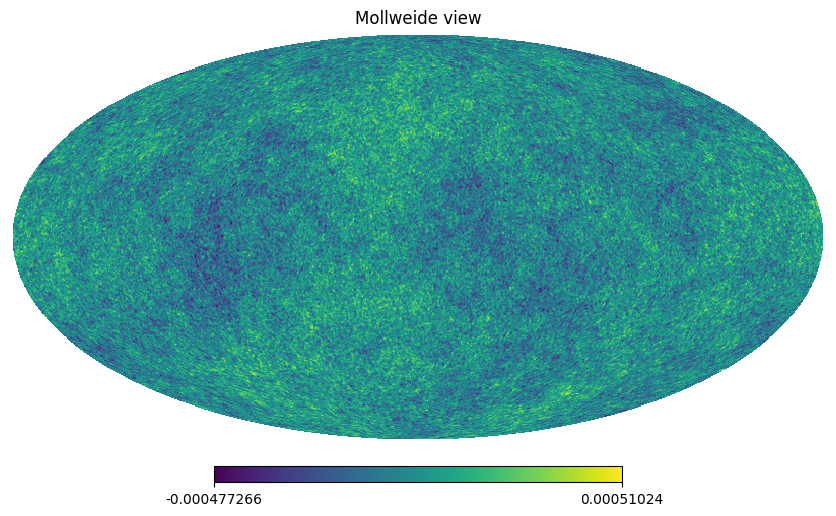

In [34]:
hp.mollview(mock_map)

In [35]:
cl_meas = hp.anafast(mock_map,lmax=2048)
print(cl_meas.shape)

#devo avere un'alta risoluzione e un lmax alto altrimenti taglio troppo e i misurati non vengono 

(2049,)


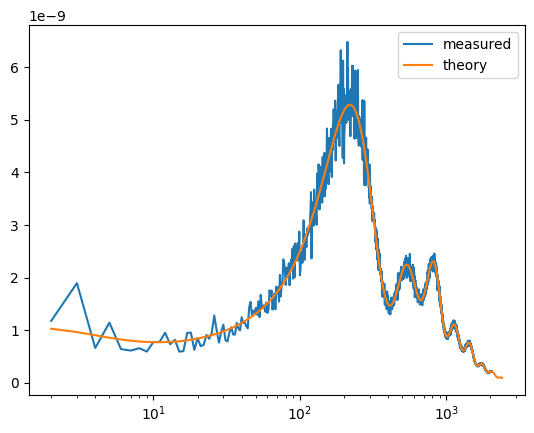

In [42]:
elle_meas = np.arange(len(cl_meas))
plt.semilogx(elle_meas[2:],cl_meas[2:]*elle_meas[2:]*(elle_meas[2:]+1)/(2*np.pi),label='measured')
plt.semilogx(ells[2:],c_l[2:]*ells[2:]*(ells[2:]+1)/(2*np.pi),label='theory')
plt.legend()

In [ ]:
#visto che sono a z alti la siulazione è molto buona